In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import numpy as np

In [35]:
def import_dataset(file_path):
    
    #Import the dataset from a CSV file.

    print("--------------- Importing Dataset ---------------\n")
    try:
        dataset = pd.read_csv(file_path)
        print("Successfully Imported 'csv' file!\n")
        return dataset
    
    except Exception as e:
        print(f"Error occurred while importing dataset: {e}")    
        return None

In [36]:
data = import_dataset('sampled_file_100k.csv')

--------------- Importing Dataset ---------------

Successfully Imported 'csv' file!



##### Correlation Between Features:

In [37]:
def show_correlation_matrix(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()

    return corr_matrix


--------------- Correlation Matrix on Original Data ---------------



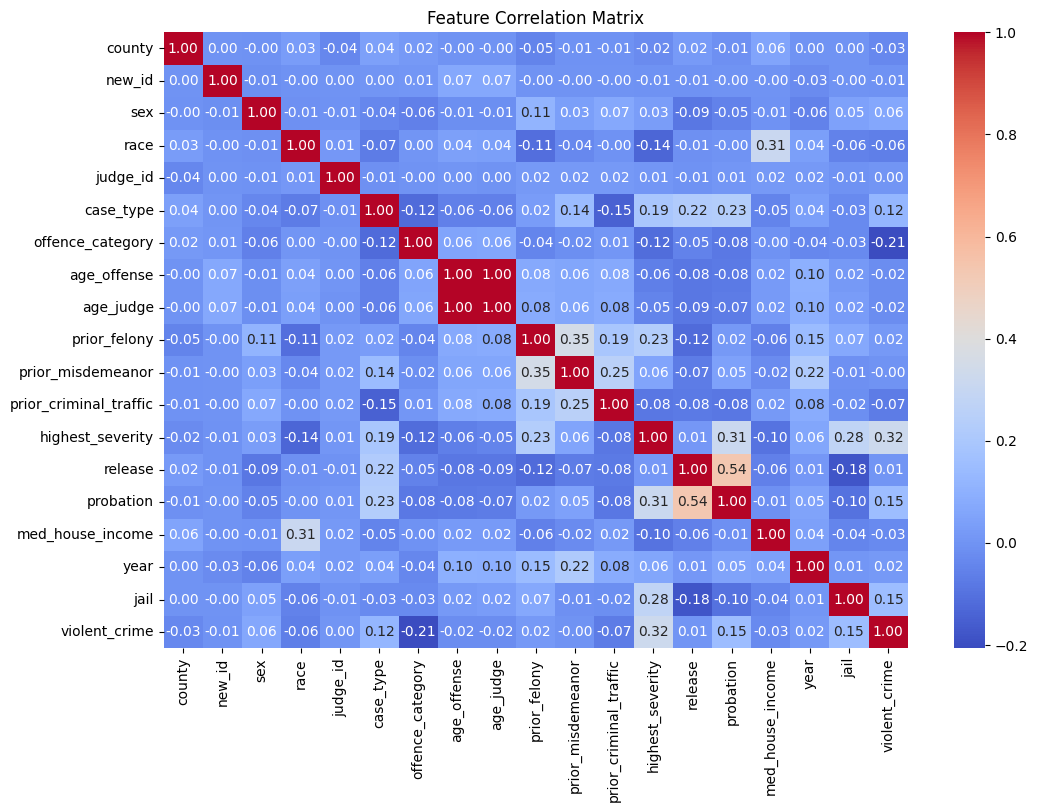

In [38]:
print("\n--------------- Correlation Matrix on Original Data ---------------\n")
corr_matrix = show_correlation_matrix(data)

##### Feature Importance Base Model:

In [39]:
model_base = joblib.load('xgb_model_base.joblib')

In [40]:
def show_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices], align="center")
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(indices)])
    plt.show()

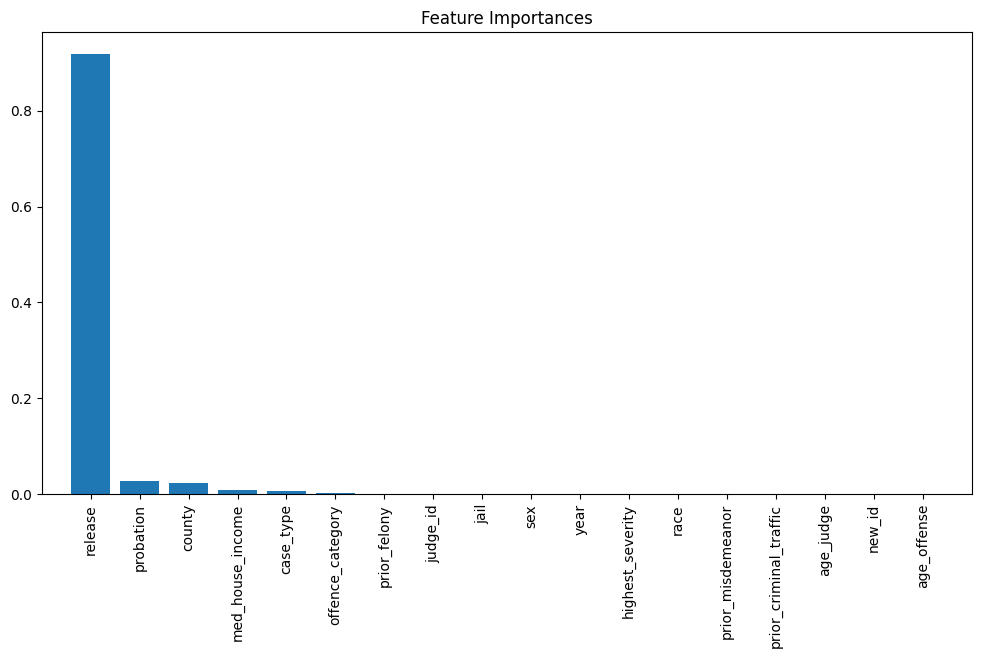

In [41]:
show_feature_importance(model_base, data.columns[:-1])

##### Feature Importance - Release:

In [42]:
model_release = joblib.load('xgb_model_release.joblib')

In [43]:
feature_importances = model_release.feature_importances_
data1 = ['new_id', 'sex', 'race', 'judge_id', 'age_judge', 'prior_felony', 'highest_severity', 'probation']

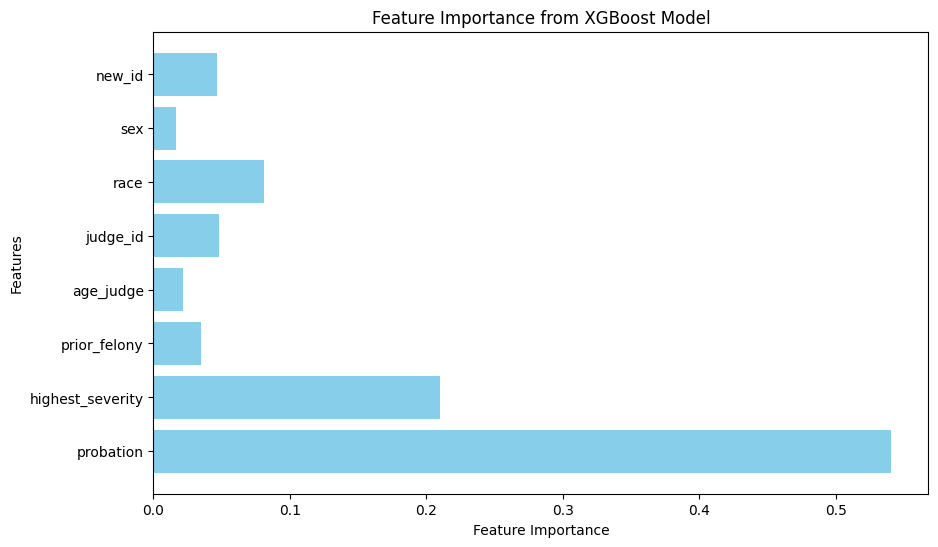

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(data1, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()